<a href="https://colab.research.google.com/github/jetowgood/Analysis-of-Alcohol-Sales-in-Iowa/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
alcohol_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_compressed.csv"

In [3]:
# import libraries
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# create dataframe for liquor sales, income, population size
df_sales = pd.read_csv(alcohol_path)

## Alcohol Sales Data

In [5]:
df_sales.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-15941000030,11/28/2018,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519187 41.598109),77.0,POLK,...,26586,GENTLEMAN JACK,12,750,20.01,30.02,2,60.04,1.50,0.39
1,INV-72674800099,07/29/2024,10165,SUPER MARKET / DAVENPORT,6723 NORTHWEST BOULEVARD,DAVENPORT,52806,POINT (-90.608956036 41.589559983),NaN,SCOTT,...,80365,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,6,750,13.00,19.50,1,19.50,0.75,0.19
2,INV-23115800035,11/08/2019,5851,CASEY'S GENERAL STORE #74 - MORNING SUN,618 S CHURCH STREET,MORNING SUN,52640,POINT (-91.254443 41.089418),58.0,LOUISA,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,50,30.00,45.00,1,45.00,0.05,0.01
3,S18074600012,03/25/2014,4490,CASEY'S GENERAL STORE #2766 / CEDAR,380 33RD AVE SW,CEDAR RAPIDS,52404,POINT (-91.67222100000001 41.944954),57.0,LINN,...,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,14.04,21.05,3,63.15,2.25,0.59
4,INV-29537400055,08/18/2020,2535,HY-VEE FOOD STORE #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265.0,NaN,77.0,POLK,...,88296,PATRON SILVER,12,750,27.50,41.25,1,41.25,0.75,0.19


In [6]:
# column names
df_sales.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [7]:
# data info, dtype of each column
# some columns have missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    500000 non-null  object 
 1   Date                   500000 non-null  object 
 2   Store Number           500000 non-null  int64  
 3   Store Name             500000 non-null  object 
 4   Address                498607 non-null  object 
 5   City                   498607 non-null  object 
 6   Zip Code               498606 non-null  object 
 7   Store Location         458648 non-null  object 
 8   County Number          403838 non-null  float64
 9   County                 497361 non-null  object 
 10  Category               499717 non-null  float64
 11  Category Name          499575 non-null  object 
 12  Vendor Number          500000 non-null  float64
 13  Vendor Name            500000 non-null  object 
 14  Item Number            500000 non-nu

In [8]:
# drop data columns
drop_columns = ['Invoice/Item Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'Store Number', 'County', 'Item Description']

df_sales.drop(drop_columns, axis=1, inplace=True)

# checking for missing values
print(df_sales.isna().sum())

Date              0
Sale (Dollars)    0
dtype: int64


In [9]:
# drop na/null values
df_sales.dropna(inplace=True)
print(df_sales.isna().sum())

print(df_sales.shape)

Date              0
Sale (Dollars)    0
dtype: int64
(500000, 2)


In [10]:
# change date format to month and year
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

df_sales.head()

,Date,Sale (Dollars)
0,2018-11-28,60.04
1,2024-07-29,19.50
2,2019-11-08,45.00
3,2014-03-25,63.15
4,2020-08-18,41.25


## Time Series Analysis


In [11]:
df_alcohol = df_sales.copy()

In [12]:
# order data chronologically
df_alcohol.sort_values(by='Date', inplace=True)

In [13]:
# monthly
df_temp = df_alcohol.set_index('Date')
df_timeseries = df_temp.resample('M').mean()
df_timeseries.rename(columns={'Sale (Dollars)': 'Sales'}, inplace=True)
df_timeseries.head()

/tmp/ipython-input-13-1081265852.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_timeseries = df_temp.resample('M').mean()


,Sales
Date,
2012-01-31,101.119912
2012-02-29,115.128578
2012-03-31,110.548983
2012-04-30,118.623991
2012-05-31,111.839279


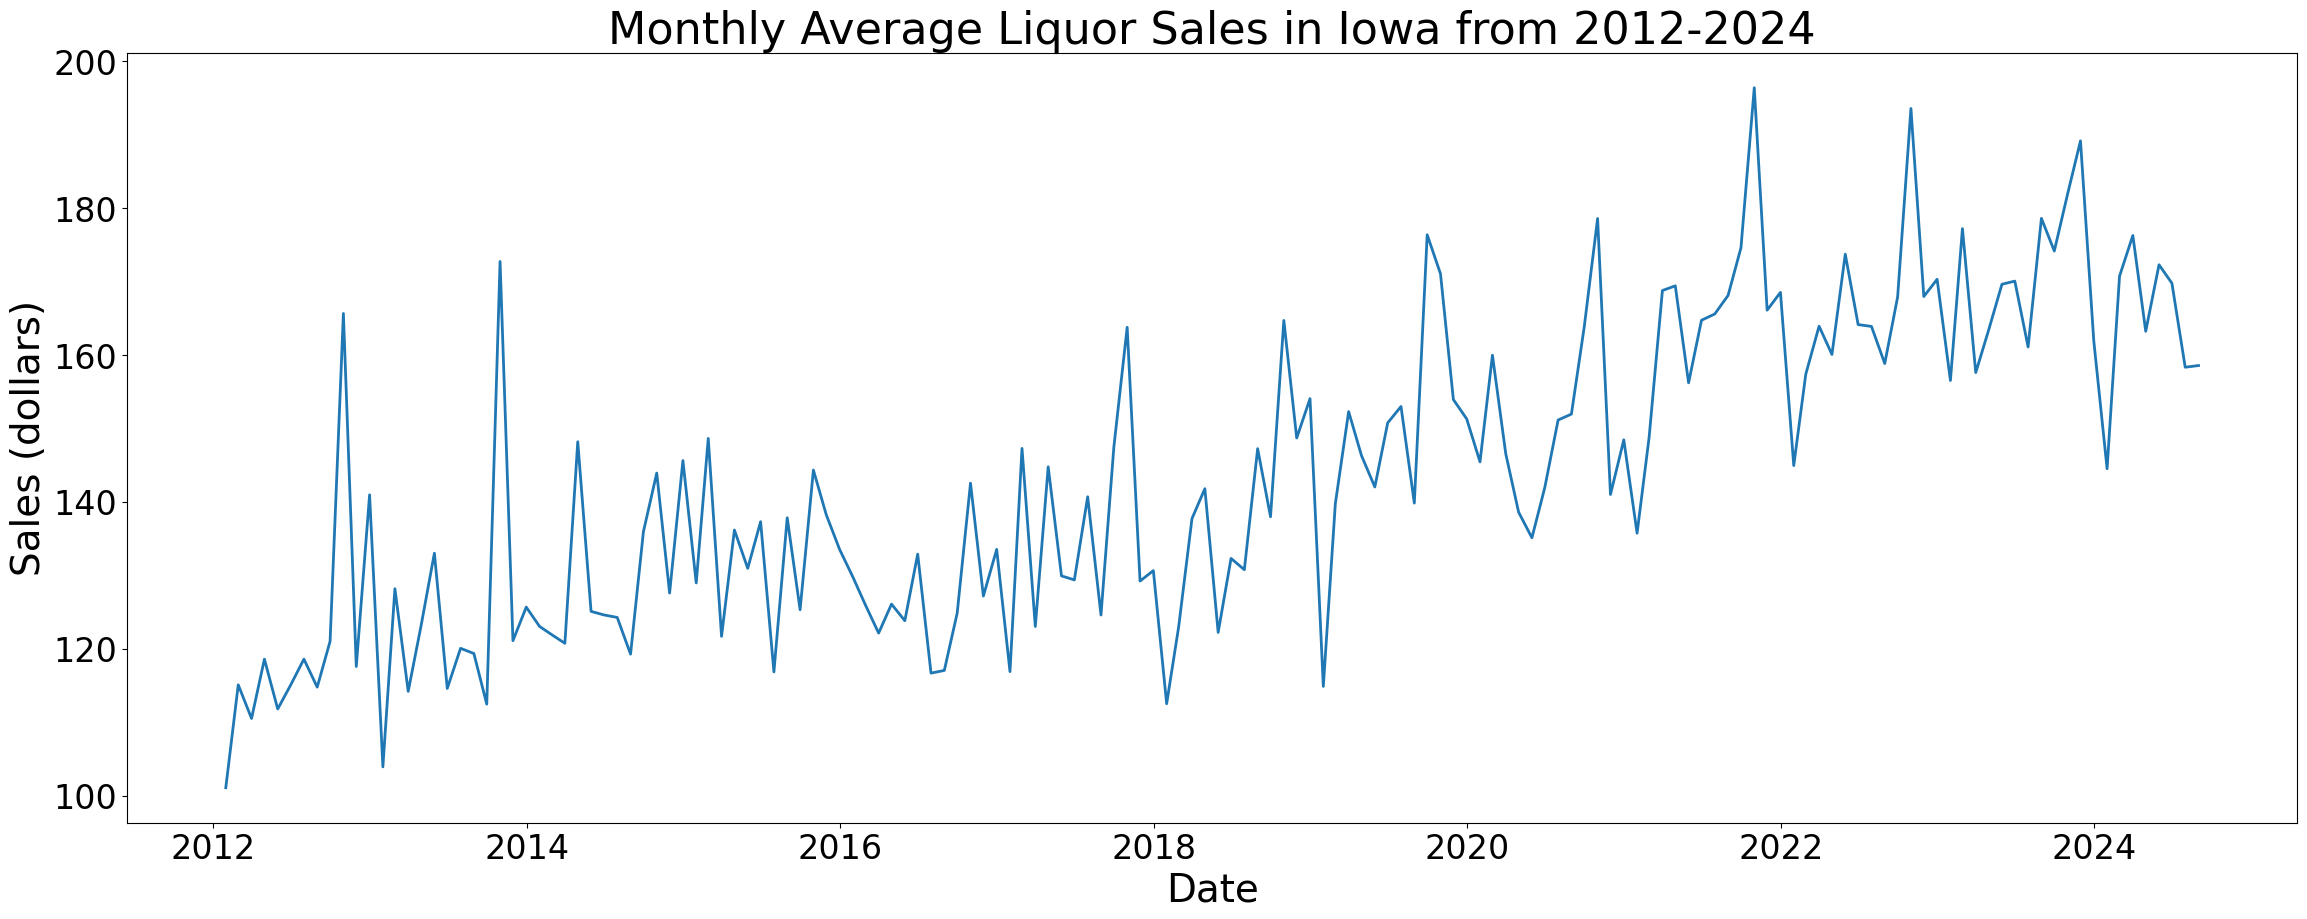

In [14]:
fig, ax = plt.subplots(figsize = (28,10))
ax.plot(df_timeseries['Sales'], linewidth = 2)
plt.xlabel("Date", fontsize = 28)
plt.xticks(fontsize = 24)
plt.ylabel("Sales (dollars)", fontsize = 28)
plt.yticks(fontsize = 24)
plt.title("Monthly Average Liquor Sales in Iowa from 2012-2024", fontsize = 32)
plt.show()

<Figure size 640x480 with 0 Axes>

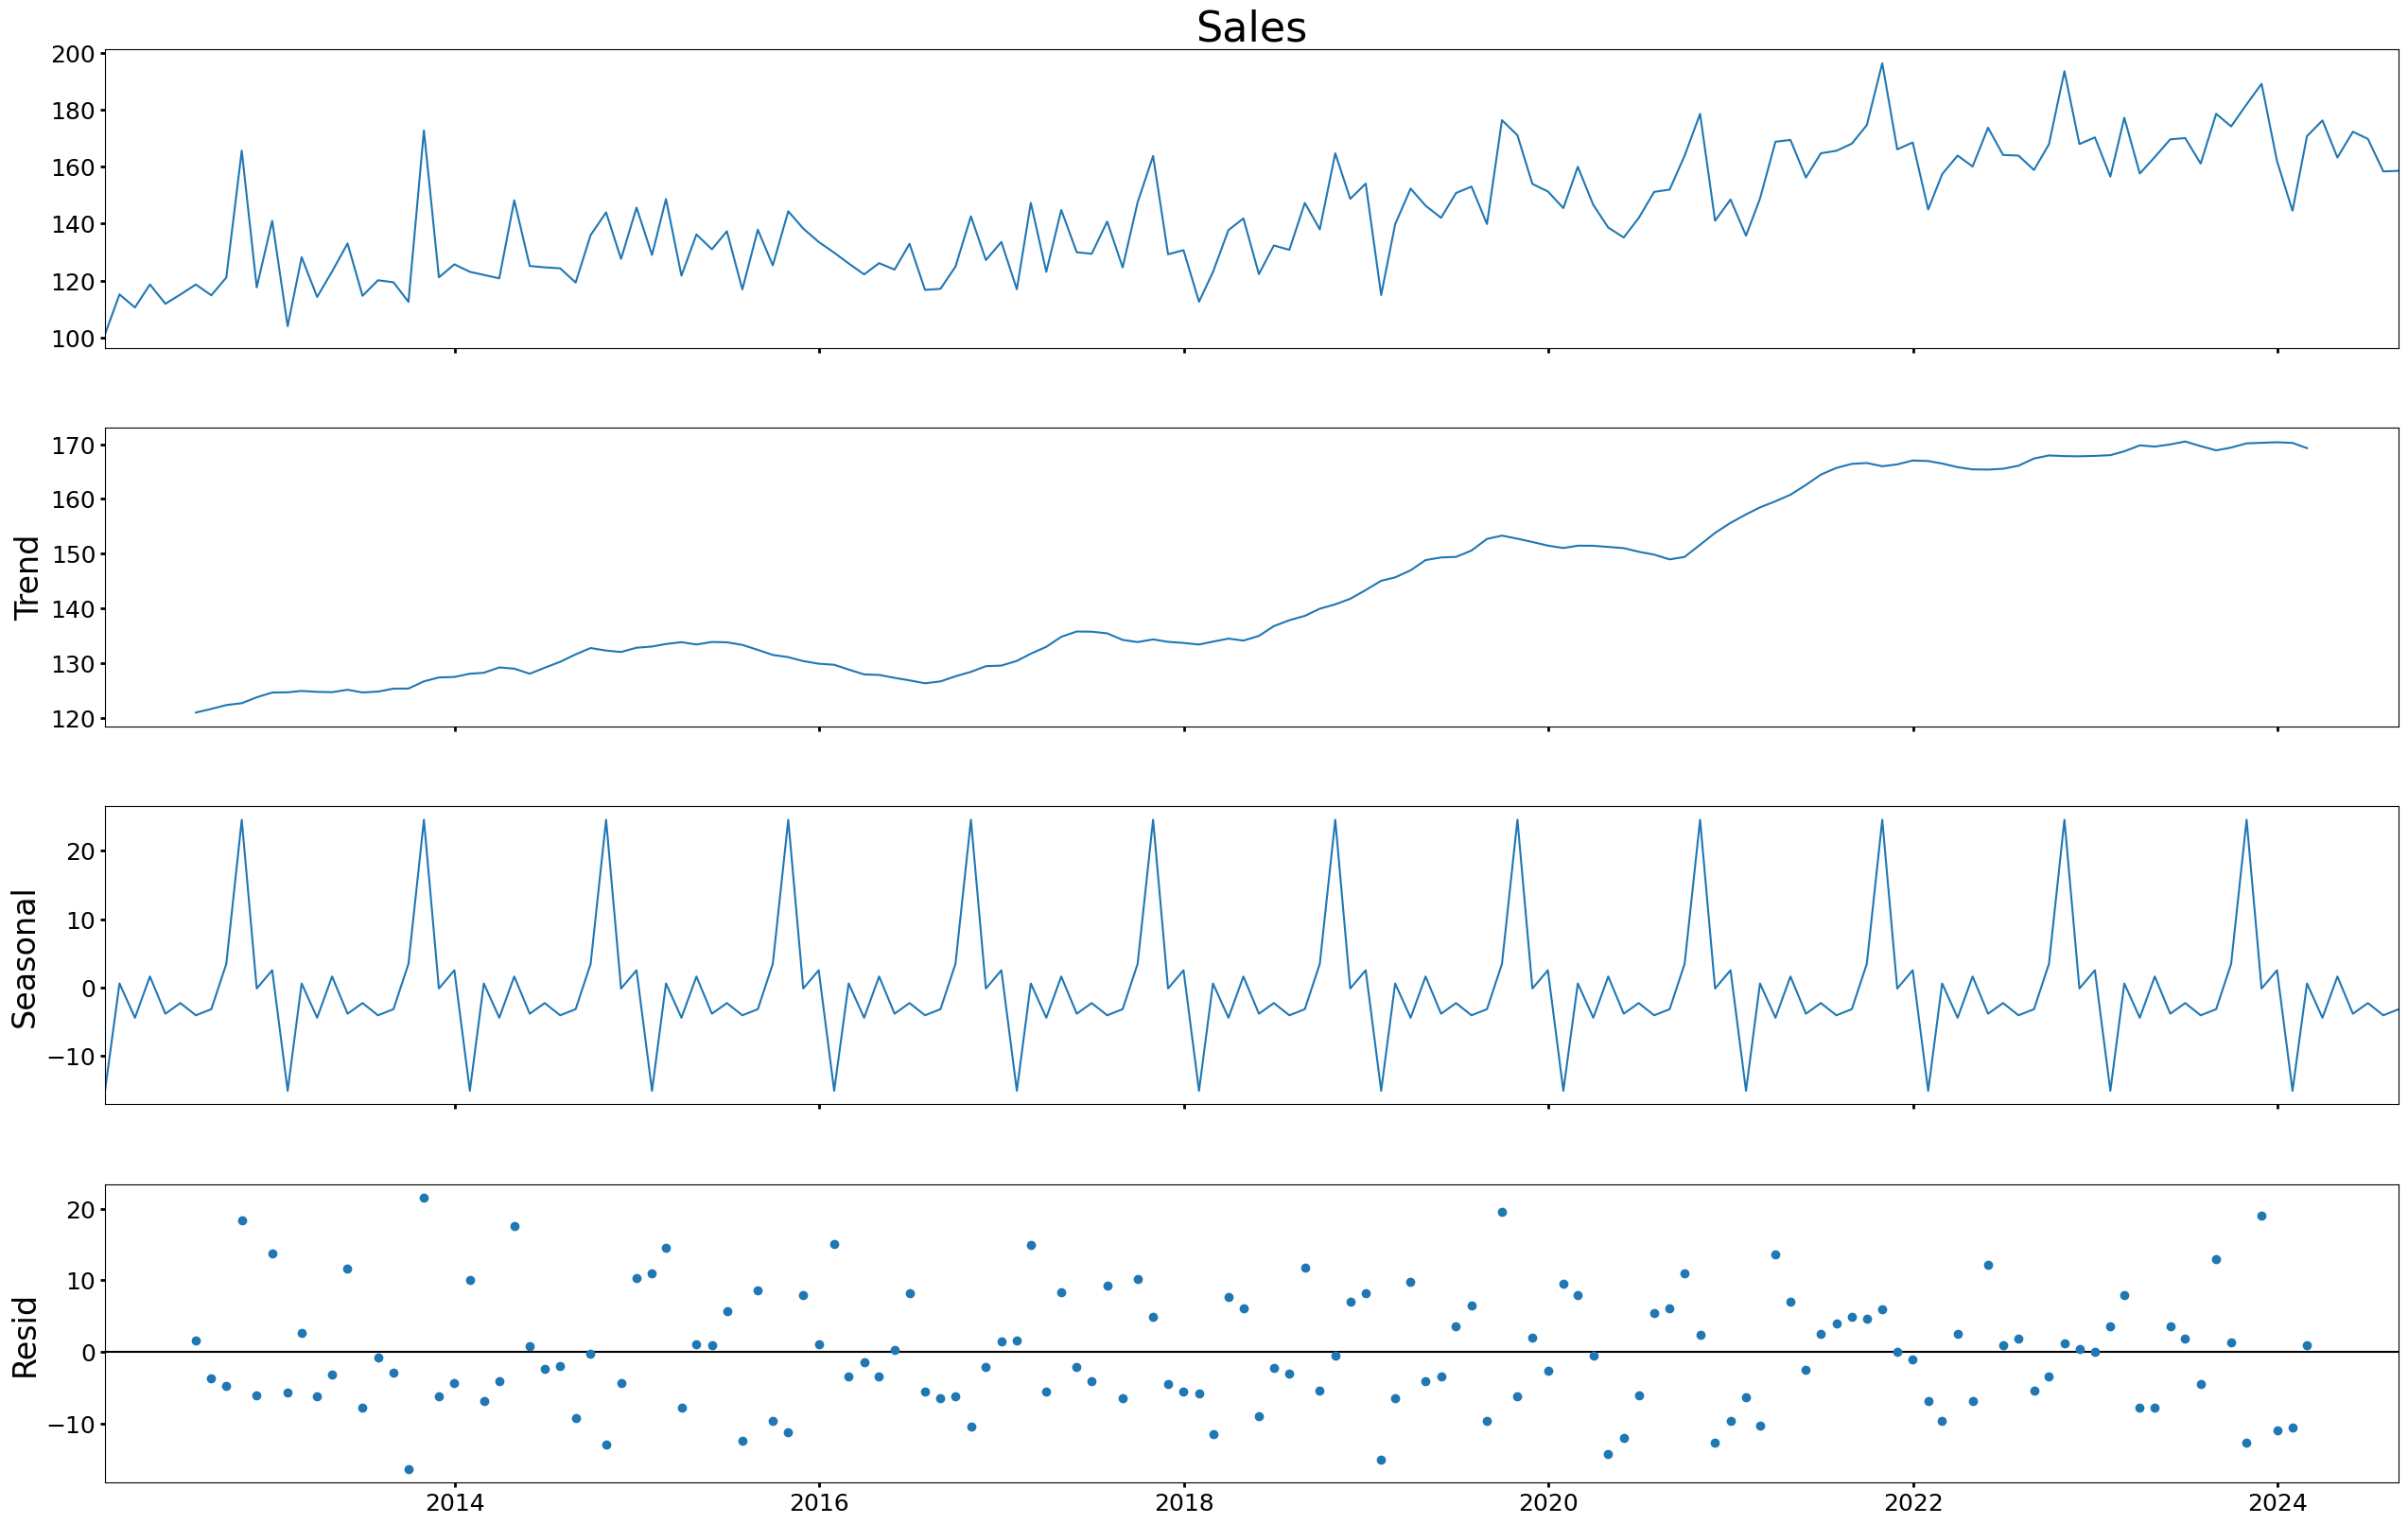

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_timeseries['Sales'],
                                   # model = 'additive',
                                  period = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(28, 18)
for ax in fig.axes:
  ax.title.set_size(32)
  ax.xaxis.label.set_size(24)
  ax.yaxis.label.set_size(24)
  ax.tick_params(axis='both', width = 2, labelsize=18)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
adf_results = adfuller(df_timeseries['Sales'], autolag='AIC')

print(f'ADF statistic: {adf_results[0]}')
print(f'p-value: {adf_results[1]}')
print(f'Is the data stationary?: {adf_results[1] < 0.05}')

ADF statistic: -0.268665451047615
p-value: 0.92982649171189
Is the data stationary?: False


In [17]:
# remove trend
new_df = df_timeseries.diff()
new_df.dropna(inplace=True)

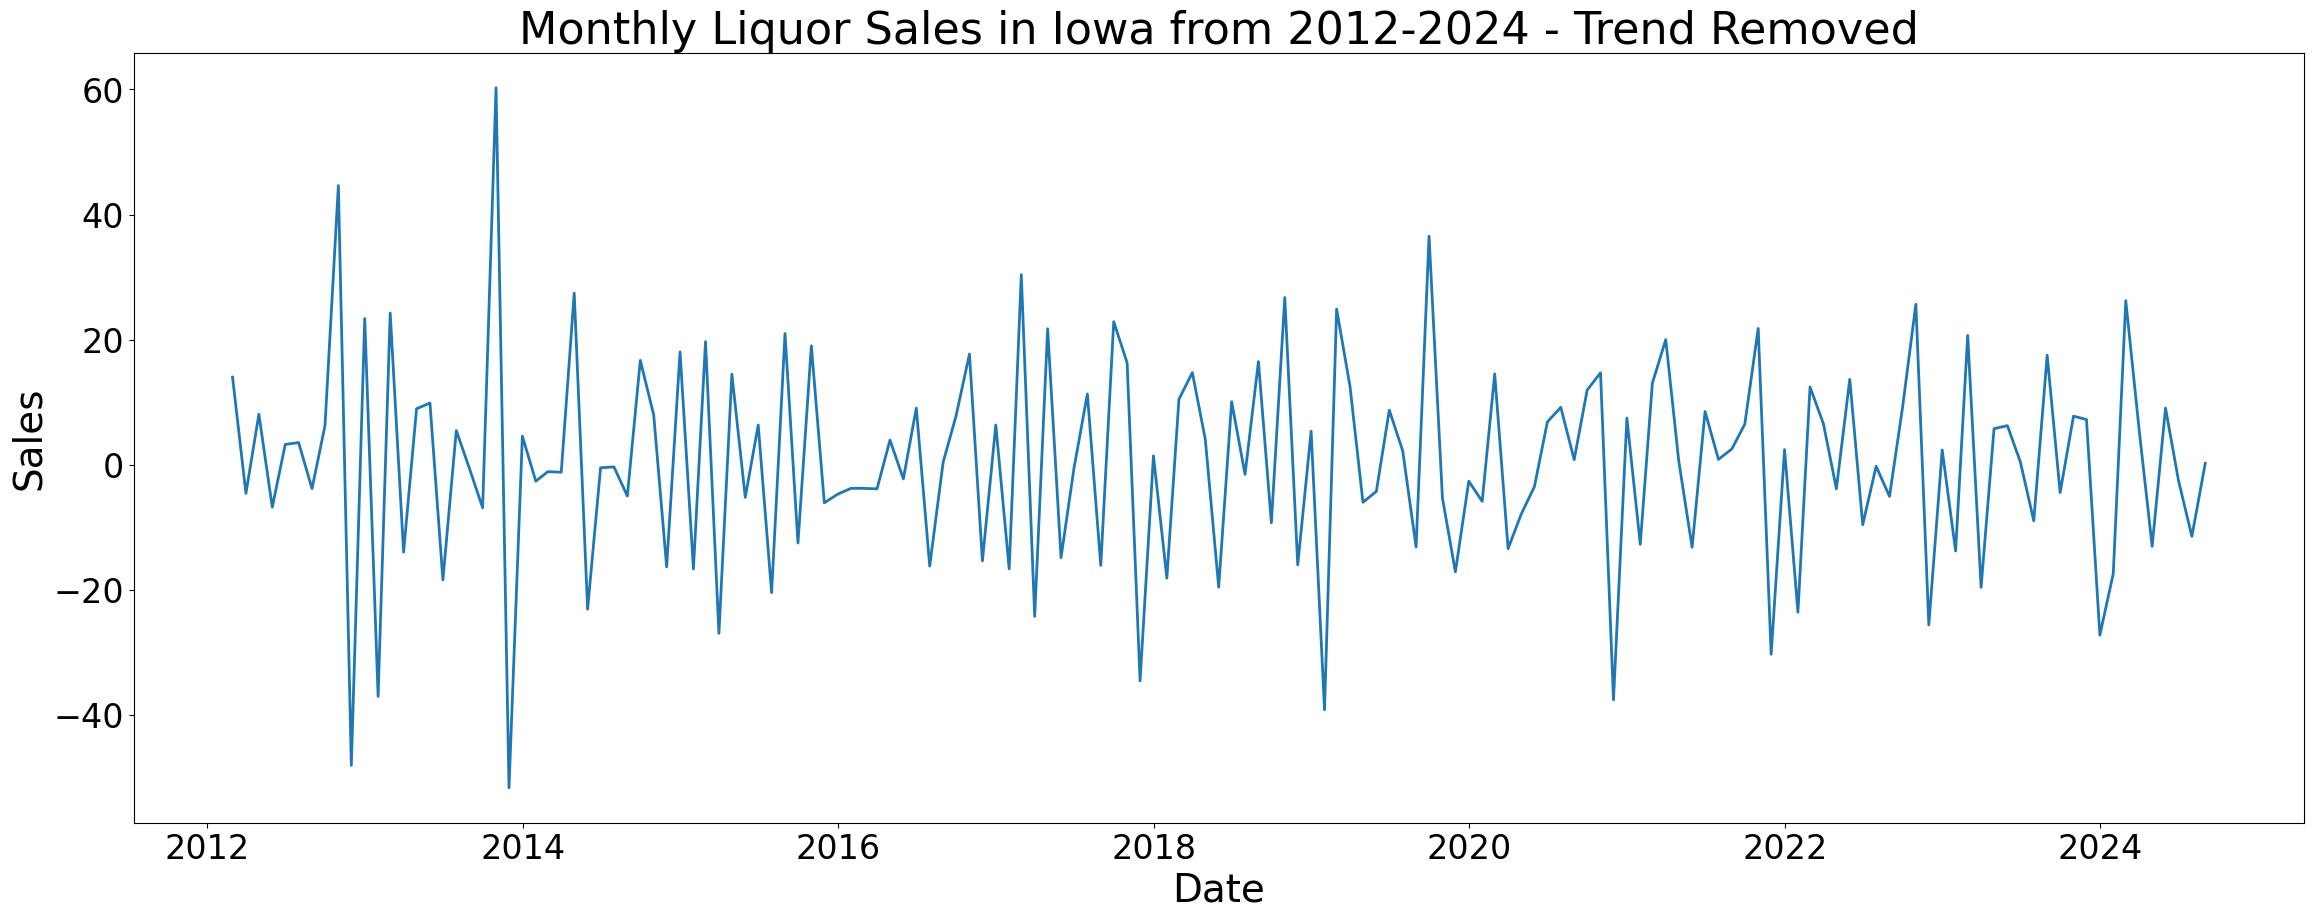

In [18]:
fig, ax = plt.subplots(figsize = (28,10))
ax.plot(new_df, linewidth = 2)
plt.xlabel("Date", fontsize = 28)
plt.xticks(fontsize = 24)
plt.ylabel("Sales", fontsize = 28)
plt.yticks(fontsize = 24)
plt.title("Monthly Liquor Sales in Iowa from 2012-2024 - Trend Removed", fontsize = 32)
plt.show()

In [19]:
new_df.size

151

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

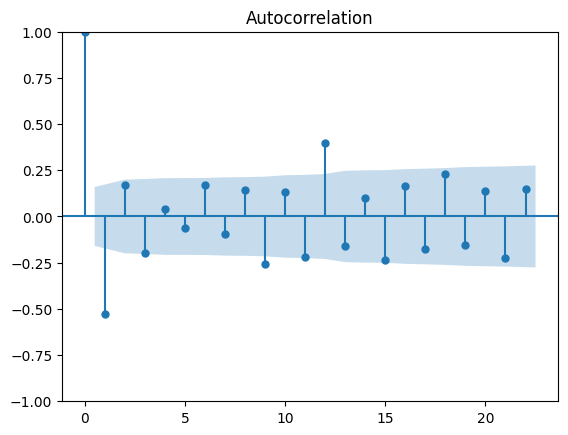

In [21]:
plot_acf(new_df['Sales'])
plt.show()

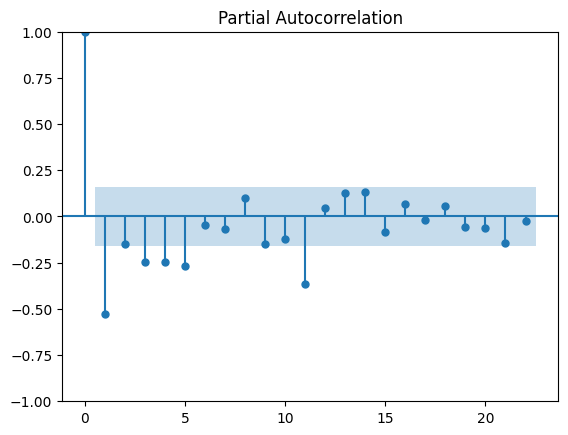

In [22]:
plot_pacf(new_df['Sales'])
plt.show()

In [23]:
## !pip install --upgrade numpy pmdarima

In [25]:
# import pmdarima
import pmdarima as pmd

model = pmd.auto_arima(df_timeseries['Sales'], start_p=1, start_q=1,
                      test='adf',
                      m=12,
                      seasonal = True,
                      trace = True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1190.662, Time=2.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1359.363, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1220.255, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1274.799, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1946.508, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1204.058, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1187.164, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1224.985, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1172.493, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=1172.953, Time=5.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1215.730, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1204.397, Time=1.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=1174.414, Time=2.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=1173.043, Time=2.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1226.144, Time=1.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=1204.279, Time=5.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1187.531, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12]             : AIC=1171.250, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[12]             : AIC=1189.212, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12]             : AIC=1161.906, Time=1.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12]             : AIC=1160.082, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12]             : AIC=1205.454, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[12]             : AIC=1161.931, Time=5.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12]             : AIC=1225.615, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12]             : AIC=1191.379, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[12]             : AIC=1163.940, Time=2.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12]             : AIC=1264.236, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12]             : AIC=1238.544, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12]             : AIC=1161.494, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,1)[12]             : AIC=1161.559, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12]             : AIC=1274.580, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[12]             : AIC=1256.865, Time=1.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12]             : AIC=1191.008, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,1)[12]             : AIC=1163.179, Time=1.48 sec

Best model:  ARIMA(1,0,1)(1,0,1)[12]          
Total fit time: 54.472 seconds


In [26]:
# train test split
# monthly
train_data = df_timeseries.iloc[:140, :]
test_data = df_timeseries.iloc[140:, :]

# daily
#df_train = df_timeseries.iloc[:3012, :]
#df_test = df_timeseries.iloc[3012:, :]
train_data.head()

,Sales
Date,
2012-01-31,101.119912
2012-02-29,115.128578
2012-03-31,110.548983
2012-04-30,118.623991
2012-05-31,111.839279


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
model = SARIMAX(train_data['Sales'], order=(1,0,1), seasonal_order=(1,0,1,12))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [29]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  140
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -529.521
Date:                            Fri, 20 Jun 2025   AIC                           1069.041
Time:                                    06:19:28   BIC                           1083.749
Sample:                                01-31-2012   HQIC                          1075.018
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.003    298.126      0.000       0.991       1.004
ma.L1         -0.8276      0.061   

In [30]:
past_predictions = model_fit.predict()
past_predictions

,predicted_mean
Date,
2012-01-31,0.000000
2012-02-29,100.681329
2012-03-31,107.997038
2012-04-30,108.874751
2012-05-31,111.543149
...,...
2023-04-30,170.349079
2023-05-31,164.498813
2023-06-30,167.452680


In [31]:
test_predictions = model_fit.forecast(len(test_data))
test_predictions = pd.Series(test_predictions, index = test_data.index)
residuals = test_data['Sales'] - test_predictions

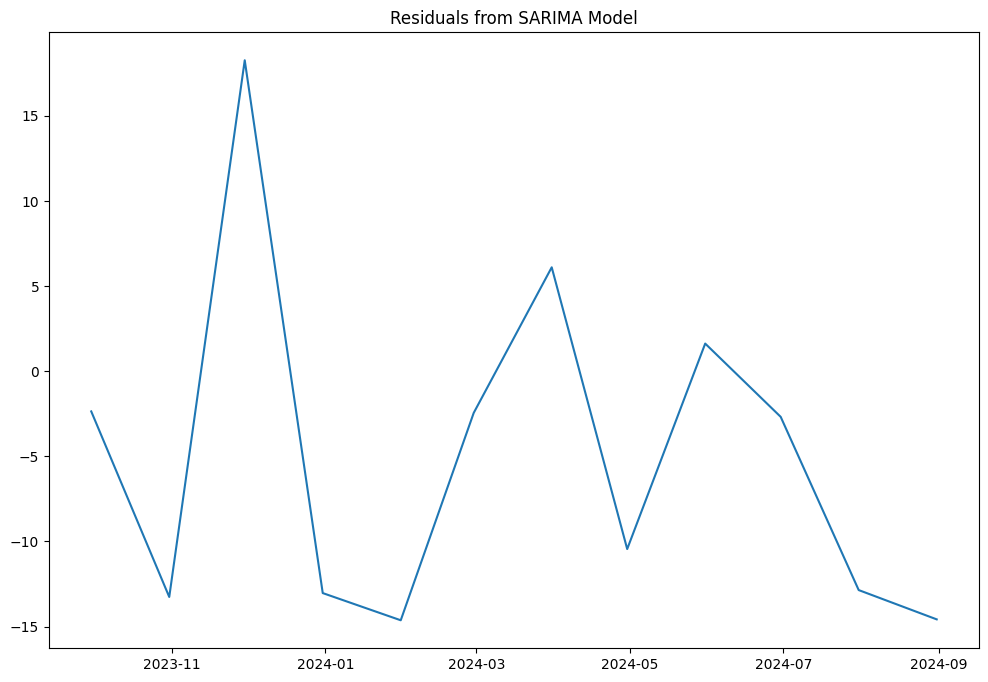

In [32]:
plt.figure(figsize = (12,8))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.show()

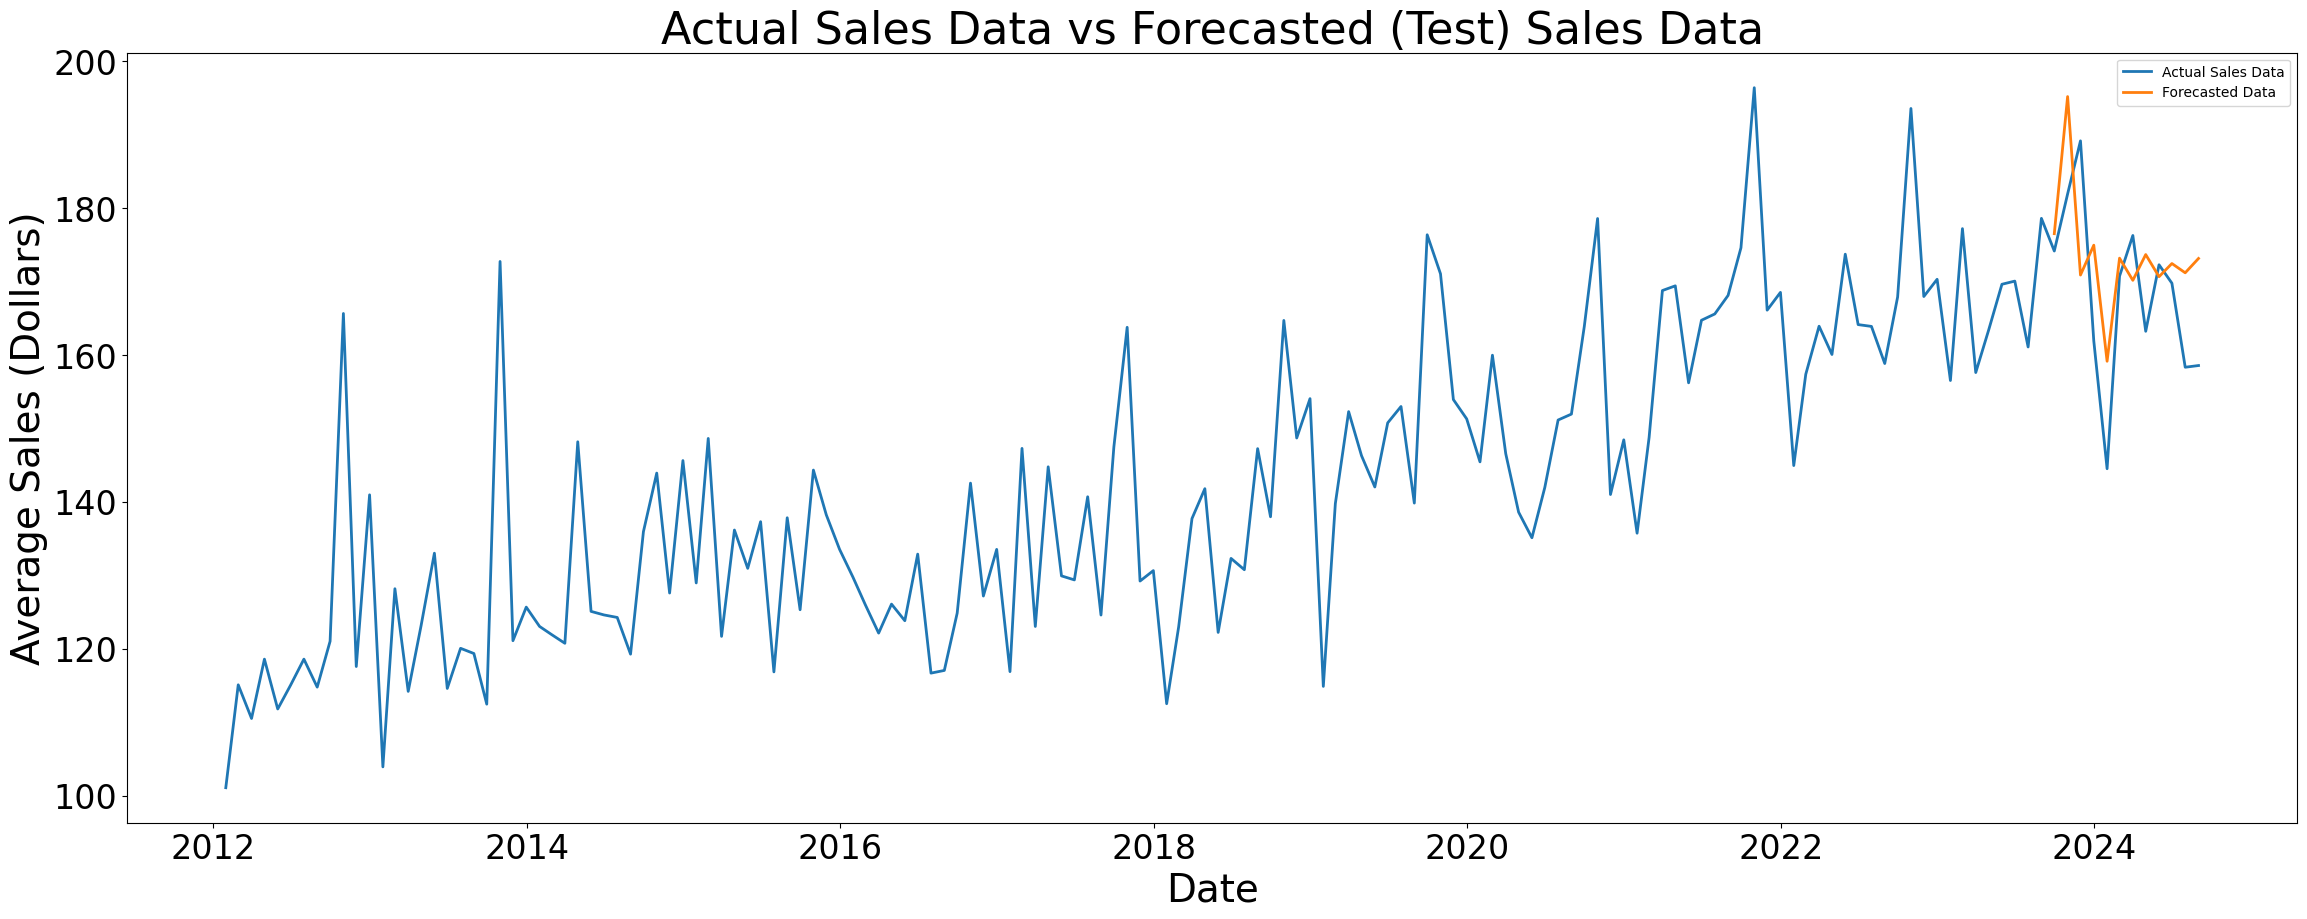

In [33]:
plt.figure(figsize = (28,10))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(test_predictions, label = 'Forecasted Data', linewidth = 2)
plt.title('Actual Sales Data vs Forecasted (Test) Sales Data', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error as mae
print('Mean Absolute Error:', mae(test_data['Sales'], test_predictions) )

Mean Absolute Error: 9.35782272145253


In [35]:
from sklearn.metrics import root_mean_squared_error as rmse
print('Root Mean Squared Error:', rmse(test_data['Sales'], test_predictions))

Root Mean Squared Error: 10.951153594006035


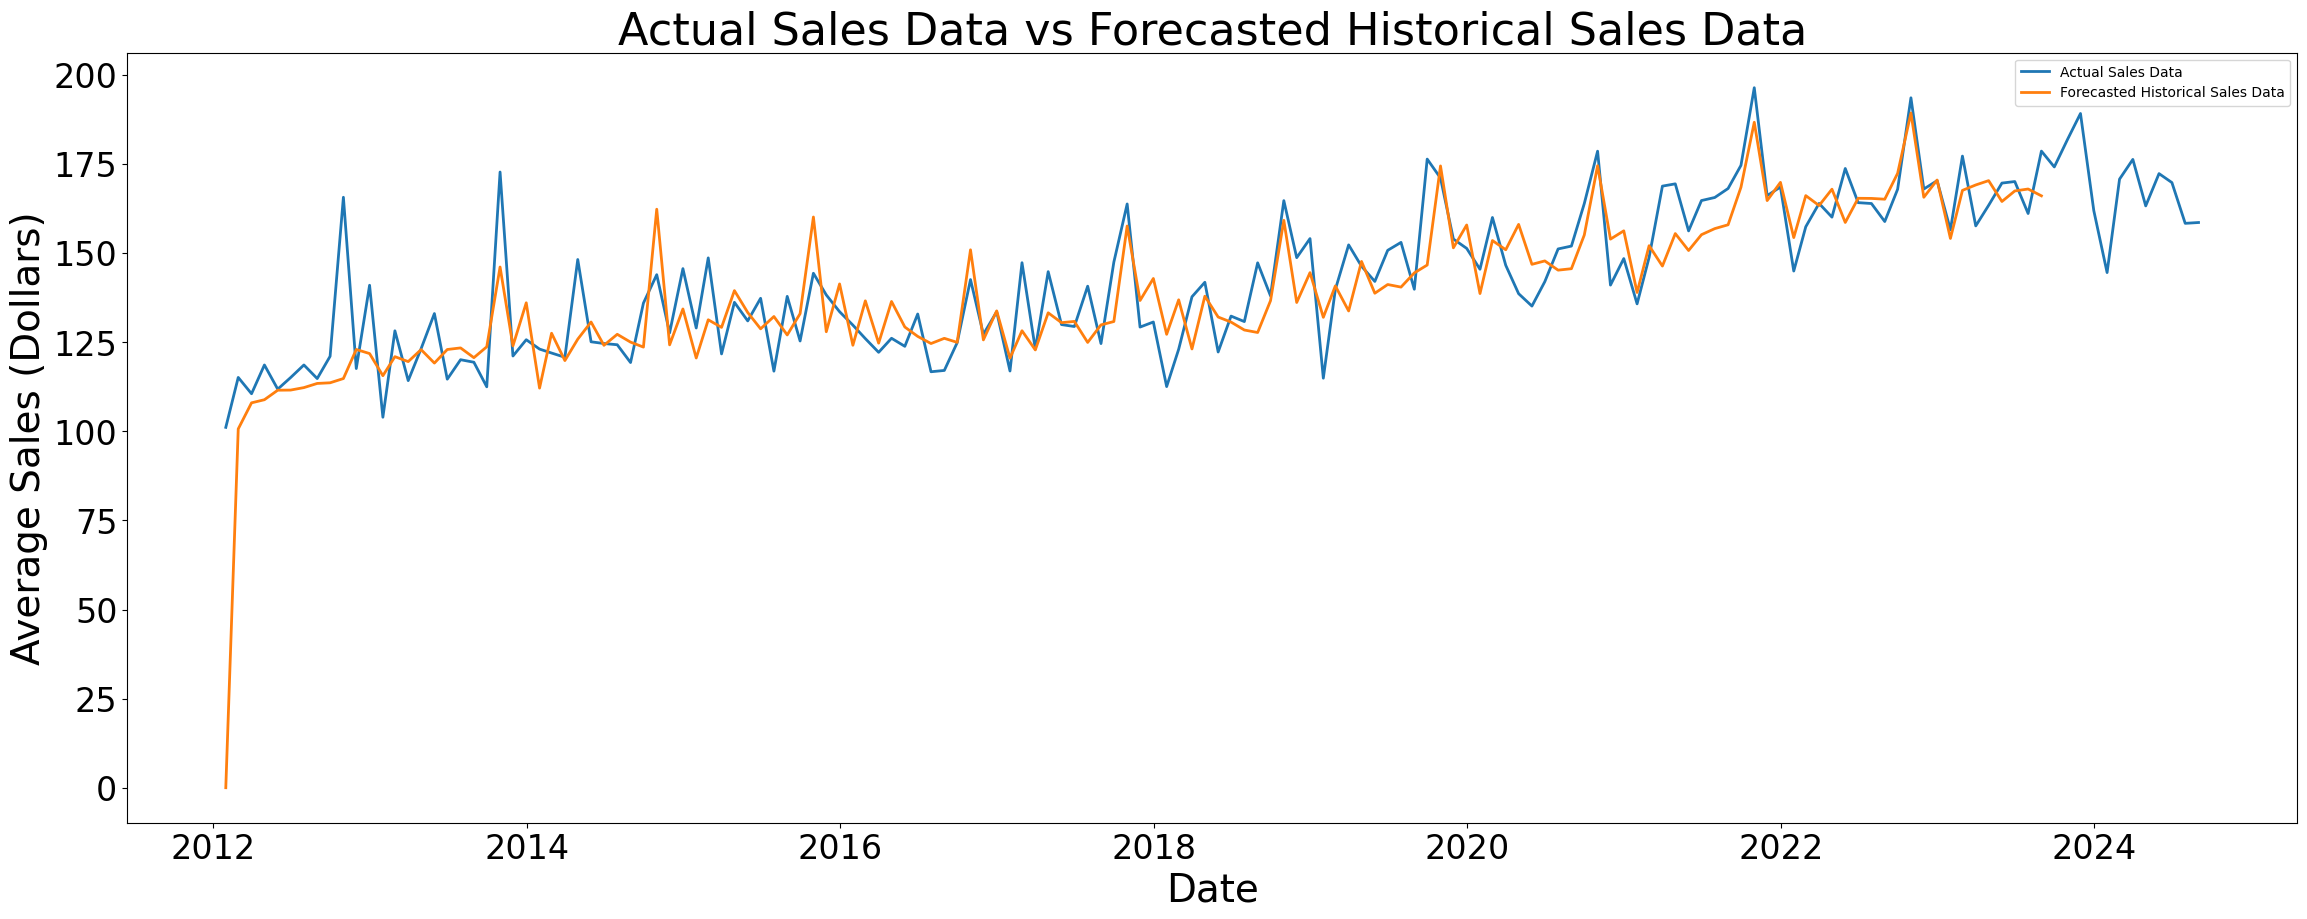

In [36]:
plt.figure(figsize=(28,10))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(past_predictions, label = 'Forecasted Historical Sales Data', linewidth = 2)
plt.title('Actual Sales Data vs Forecasted Historical Sales Data', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()

In [37]:
model_a = pmd.auto_arima(train_data['Sales'], start_p=1, start_q=1,
                      test='adf',
                      m=12,
                      seasonal = True,
                      trace = True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1189.488, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1107.103, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1094.133, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1187.634, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1111.293, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1083.541, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1057.008, Time=2.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=4.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1060.447, Time=3.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12]             : AIC=inf, Time=5.62 sec

Best model:  ARIMA(0,1,1)(1,0,2)[12] intercept
Total fit time: 31.318 seconds


In [38]:
# forecast past testing data
model_a.fit(test_data['Sales'])
future_predictions = model_a.predict(n_periods = 12)
future_predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0
2024-09-30,161.080860
2024-10-31,151.275988
2024-11-30,141.956685
2024-12-31,164.109916
2025-01-31,177.282741
2025-02-28,150.627982
2025-03-31,142.857000
2025-04-30,152.052145
2025-05-31,141.065284
2025-06-30,140.644884


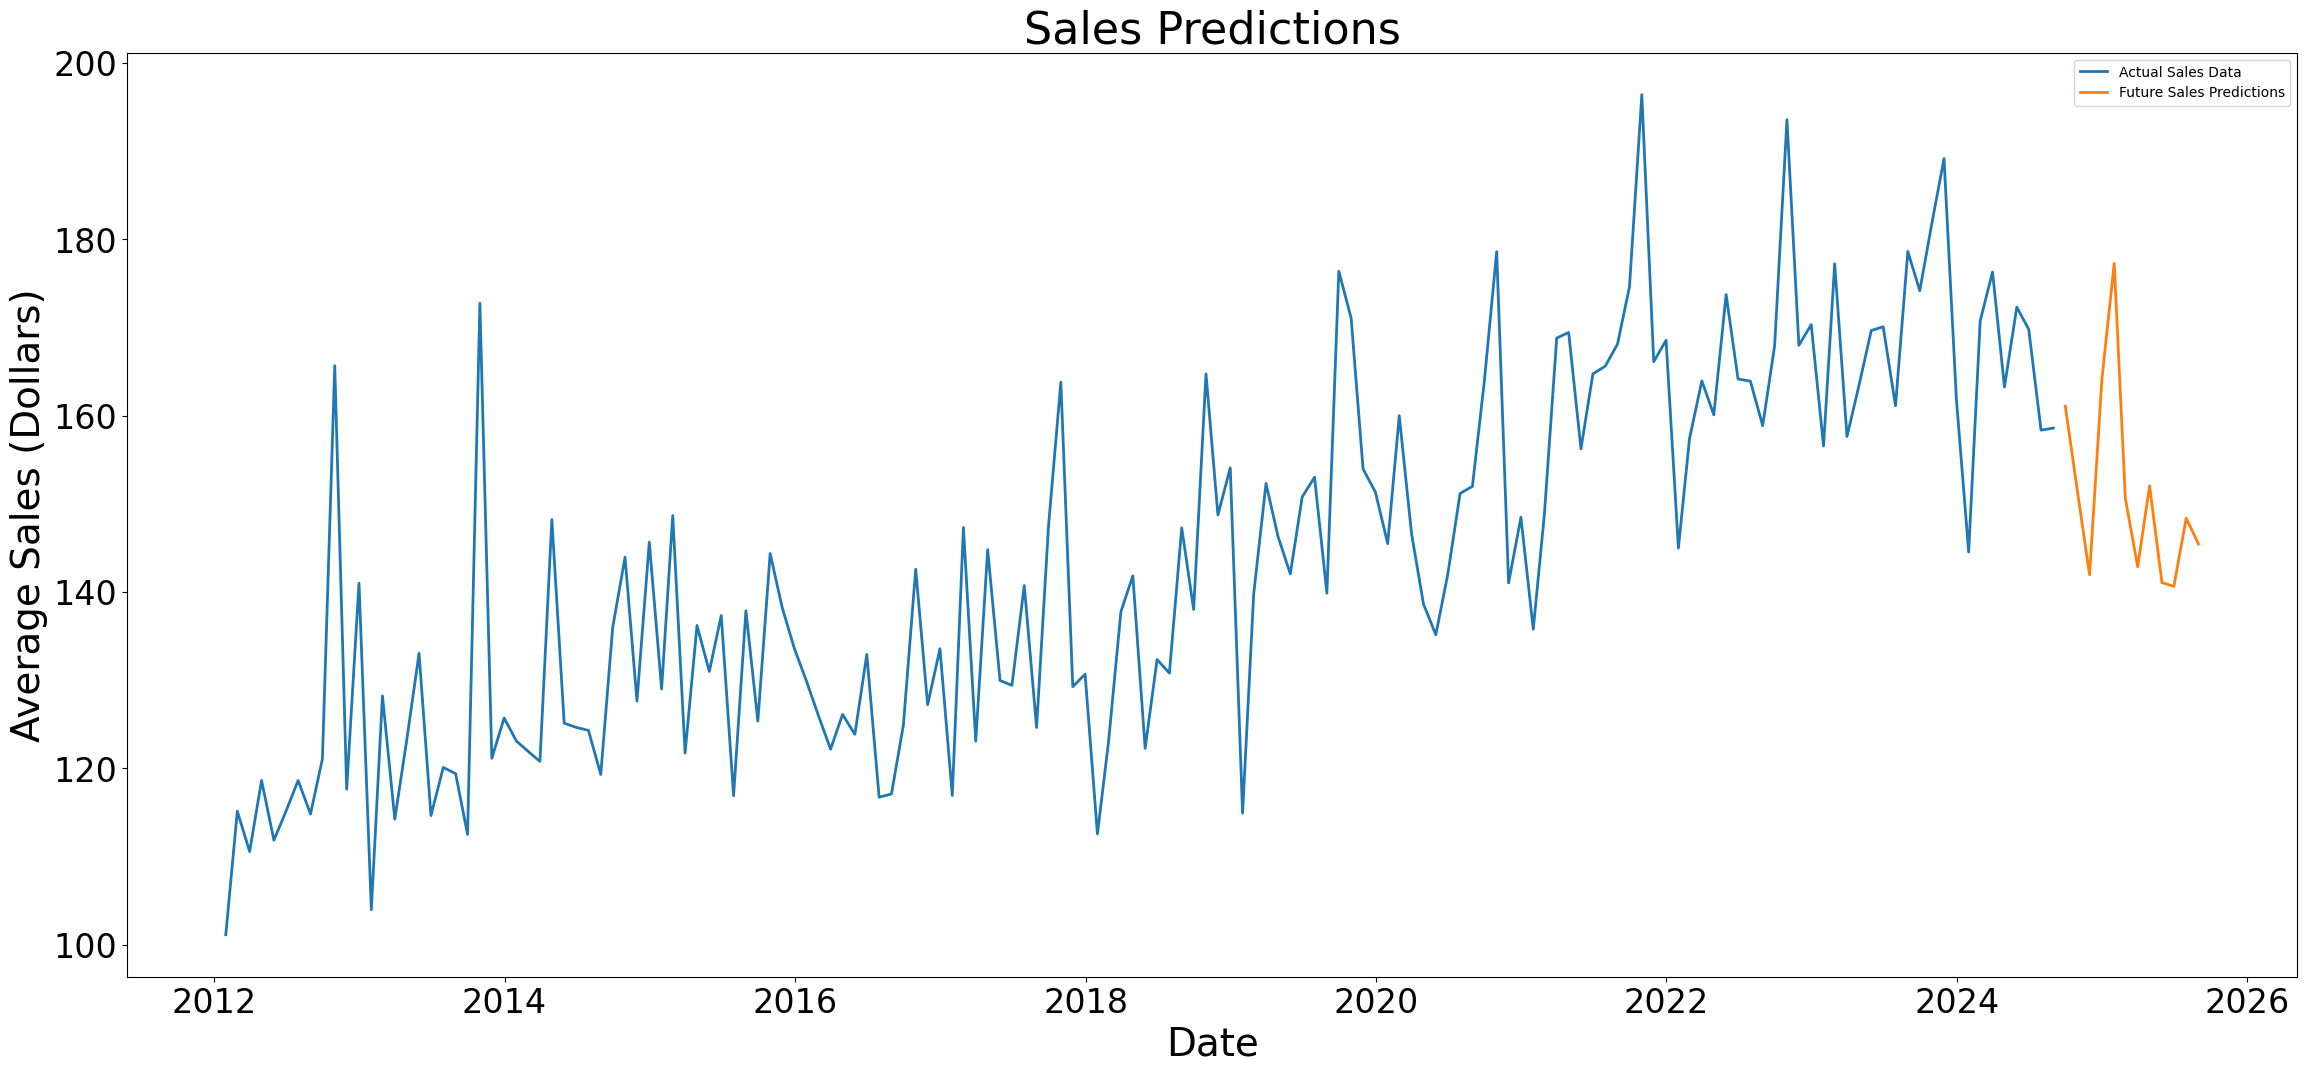

In [39]:
plt.figure(figsize = (28,12))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(future_predictions, label = 'Future Sales Predictions', linewidth = 2)
plt.title('Sales Predictions', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()